
# 多元一次线性回归

多元一次方程组可以表示为$y = w^{T}x + b$。
对于样本空间矩阵X，如果$X^{T}X$是满秩矩阵或正定矩阵，可以用以下公式计算（西瓜书）：

$ \hat{w} = (\hat{X}^{T}X)^{-1}\hat{X}^{T}y $

$\hat{w}$ 是为了计算方便，由参数(b, w) 组合而成,$\hat{x}$是(b,x)的组合


In [13]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

定义类LinearRegression，其中fit函数计算w和b的值，predict函数预测新的值。下面的变量大写字母表示矩形， 小写字母表示向量

In [14]:
class LinearRegression:
    def fit(self, X, y):
        assert X.shape[0] == y.shape[0]

        # 将X矩阵转为第一列为1，其余不变的X_hat矩阵
        ones = np.ones((X.shape[0], 1))
        X_hat = np.hstack((ones, X)) 

        W_hat = linalg.inv(X_hat.T.dot(X_hat)).dot(X_hat.T).dot(y)

        self.b = W_hat[0]
        self.W = W_hat[1:]

    def predict(self, x):
        return self.W.T.dot(x) + self.b

测试和显示结果

W=[-0.02298025  0.00012855], b=2.208538716019132


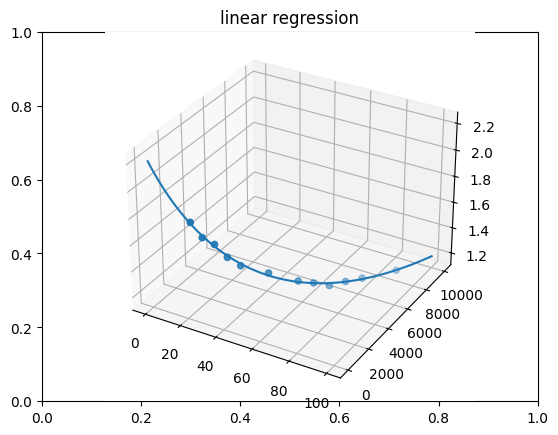

In [18]:
def main():
    X = np.array([[20, 400],
                 [25, 625],
                 [30, 900],
                 [35, 1225],
                 [40, 1600],
                 [50, 2500],
                 [60, 3600],
                 [65, 4225],
                 [70, 4900],
                 [75, 5625],
                 [80, 6400],
                 [90, 8100]]
                 )
    y = np.array([1.81, 1.70, 1.65, 1.55, 1.48, 1.40, 1.30, 1.26, 1.21, 1.21, 1.20, 1.18])

    lr = LinearRegression()
    lr.fit(X, y)
    print(f"W={lr.W}, b={lr.b}")


    plt.title('linear regression')
    ax = plt.axes(projection='3d')
    ax.scatter3D(X[:,0], X[:,1], y) 

    x = np.linspace(0,100,1000)
    y = x**2
    z = np.zeros(1000)
    for i in range(1000 ) : z[i] = lr.predict((x[i], y[i]))

    ax.plot3D(x, y, z)
    plt.show()

if __name__ == "__main__":
    main()